In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
!pip install IPython 
from IPython.display import Image

In [21]:
# 데이터 로드 및 확인
data = pd.read_csv('C:/Users/USER/OneDrive/Desktop/energyEfficiency_data.csv')

In [22]:
# 컬럼 이름 변경
data.rename(
    columns={
        'X1': 'Compactness',
        'X2': 'Total_Surface',
        'X3': 'Wall_Surface',
        'X4': 'Roof_Surface',
        'X5': 'Building_Height',
        'X6': 'Orientation',
        'X7': 'Window_Area',
        'X8': 'Window_Area_Distribution',
        'Y1': 'Heating_Load',
        'Y2': 'Cooling_Load',
    },
    inplace=True,
)

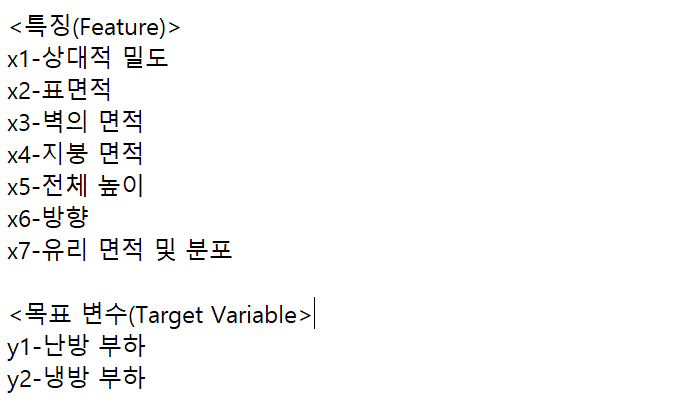

In [36]:
Image("C:/Users/USER/OneDrive/Desktop/f,tv.png")

In [23]:
data['Floor_Surface'] = data['Total_Surface'] - (data['Wall_Surface'] + data['Roof_Surface'])
features = [
    'Compactness',
    'Total_Surface',
    'Wall_Surface',
    'Roof_Surface',
    'Floor_Surface',
    'Building_Height',
    'Orientation',
    'Window_Area',
    'Window_Area_Distribution',
]
targets = ['Heating_Load', 'Cooling_Load']

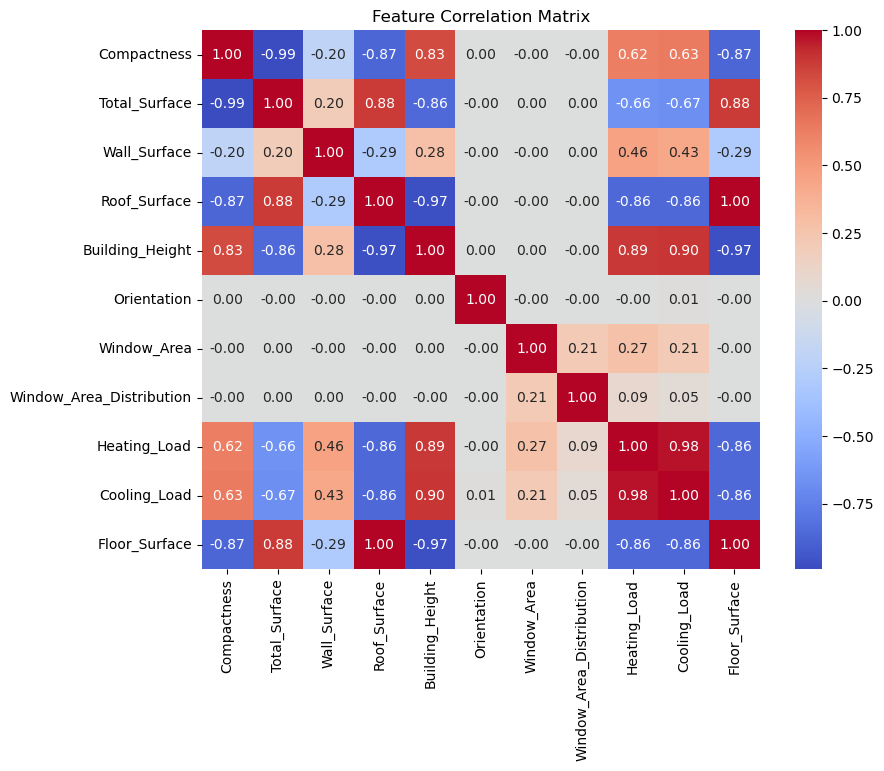

In [24]:
# 상관 행렬 시각화
plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

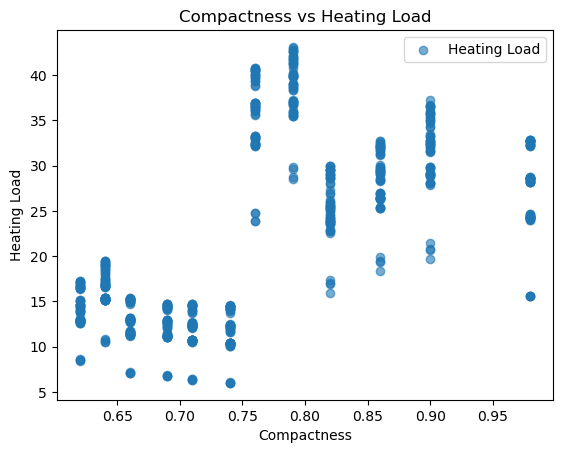

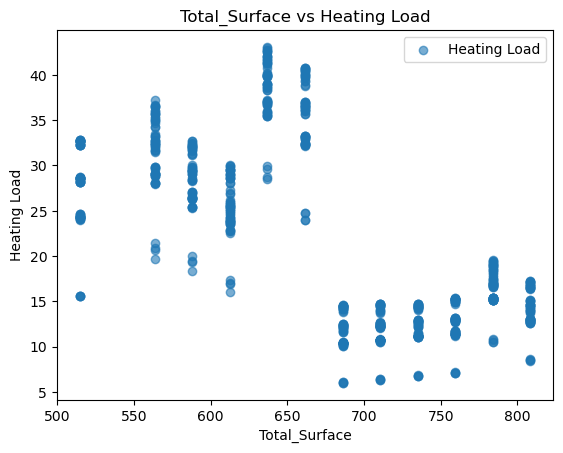

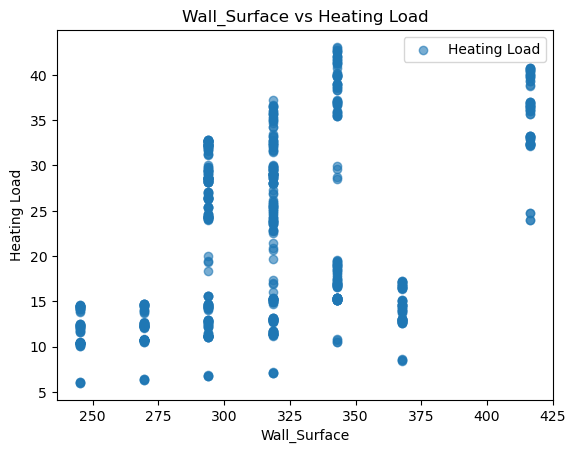

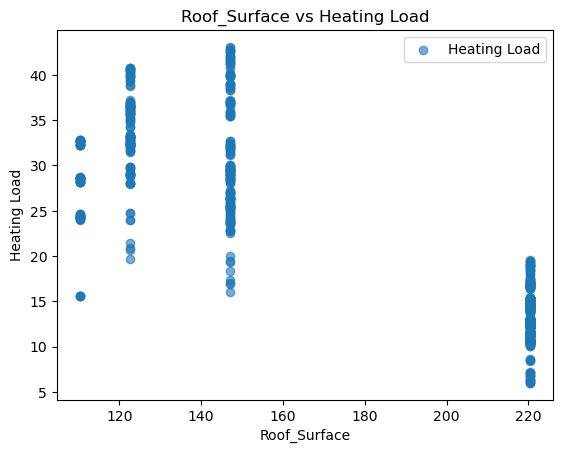

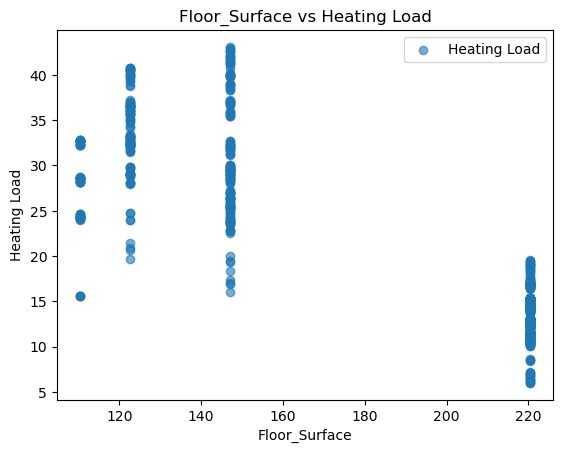

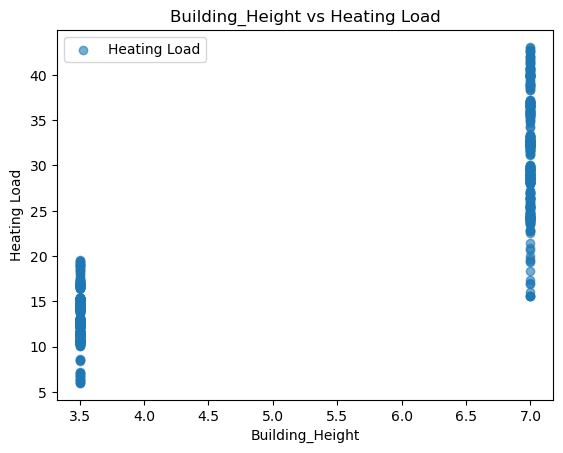

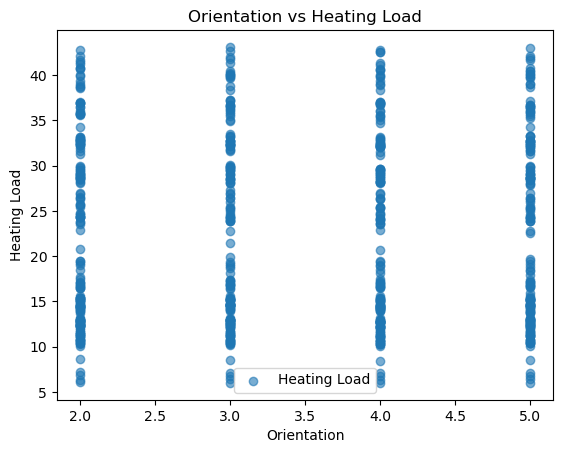

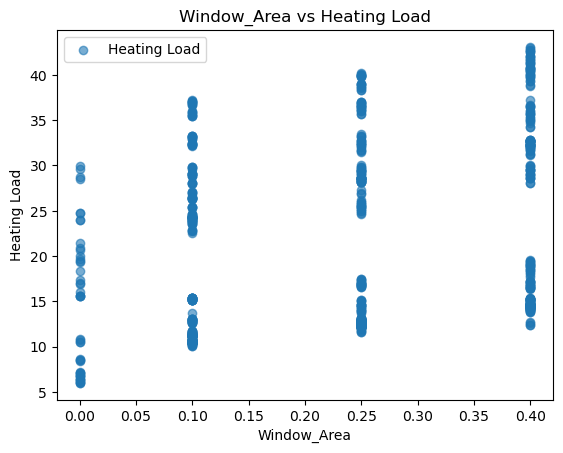

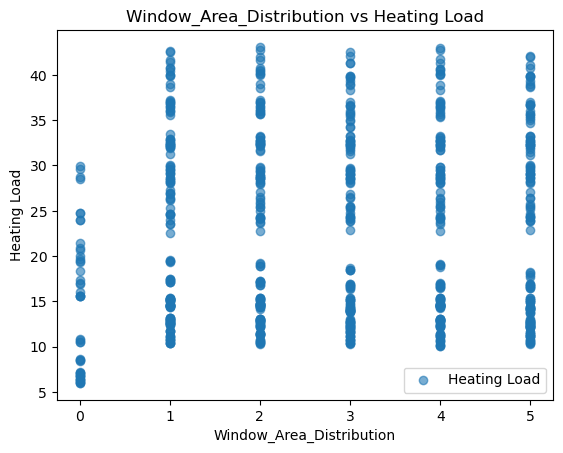

In [25]:
# 산점도 플롯으로 변수와 타겟 관계 시각화
for feature in features:
    plt.scatter(data[feature], data['Heating_Load'], alpha=0.6, label='Heating Load')
    plt.title(f'{feature} vs Heating Load')
    plt.xlabel(feature)
    plt.ylabel('Heating Load')
    plt.legend()
    plt.show()

In [26]:
# 머신러닝 알고리즘 비교 함수 정의
def compare_models(dataset):
    # 랜덤 포레스트 및 선형 회귀 성능 비교
    results = {}
    x = dataset[features]
    y = dataset[targets]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

    # 선형 회귀 모델
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    linear_train_score = round(linear_model.score(x_train, y_train), 3)
    linear_test_score = round(linear_model.score(x_test, y_test), 3)
    linear_importance = pd.DataFrame(
        {'Feature': x.columns, 'Importance': linear_model.coef_[0]}
    )

    # 랜덤 포레스트 모델
    forest_model = RandomForestRegressor(max_depth=6, random_state=55)
    forest_model.fit(x_train, y_train)
    forest_train_score = round(forest_model.score(x_train, y_train), 3)
    forest_test_score = round(forest_model.score(x_test, y_test), 3)
    forest_importance = pd.DataFrame(
        {'Feature': x.columns, 'Importance': forest_model.feature_importances_}
    )

    # 결과 저장
    results['Linear Regression'] = {
        'Train Score': linear_train_score,
        'Test Score': linear_test_score,
        'Importance': linear_importance,
    }
    results['Random Forest'] = {
        'Train Score': forest_train_score,
        'Test Score': forest_test_score,
        'Importance': forest_importance,
    }

    return results

In [27]:
data = data.dropna()
model_results = compare_models(data)

# 결과 출력
for model_name, metrics in model_results.items():
    print(f"{model_name} Results:")
    print(f"Train Score: {metrics['Train Score']}")
    print(f"Test Score: {metrics['Test Score']}")
    print(f"Feature Importance:\n{metrics['Importance']}")
    print("\n")

Linear Regression Results:
Train Score: 0.899
Test Score: 0.911
Feature Importance:
                    Feature    Importance
0               Compactness -6.521996e+01
1             Total_Surface  5.226720e+11
2              Wall_Surface -5.226720e+11
3              Roof_Surface -1.219066e+10
4             Floor_Surface -1.033153e+12
5           Building_Height  3.952137e+00
6               Orientation  1.467413e-02
7               Window_Area  2.035497e+01
8  Window_Area_Distribution  2.301783e-01


Random Forest Results:
Train Score: 0.985
Test Score: 0.985
Feature Importance:
                    Feature  Importance
0               Compactness    0.295491
1             Total_Surface    0.250677
2              Wall_Surface    0.044696
3              Roof_Surface    0.089355
4             Floor_Surface    0.065052
5           Building_Height    0.177126
6               Orientation    0.001594
7               Window_Area    0.065141
8  Window_Area_Distribution    0.010869




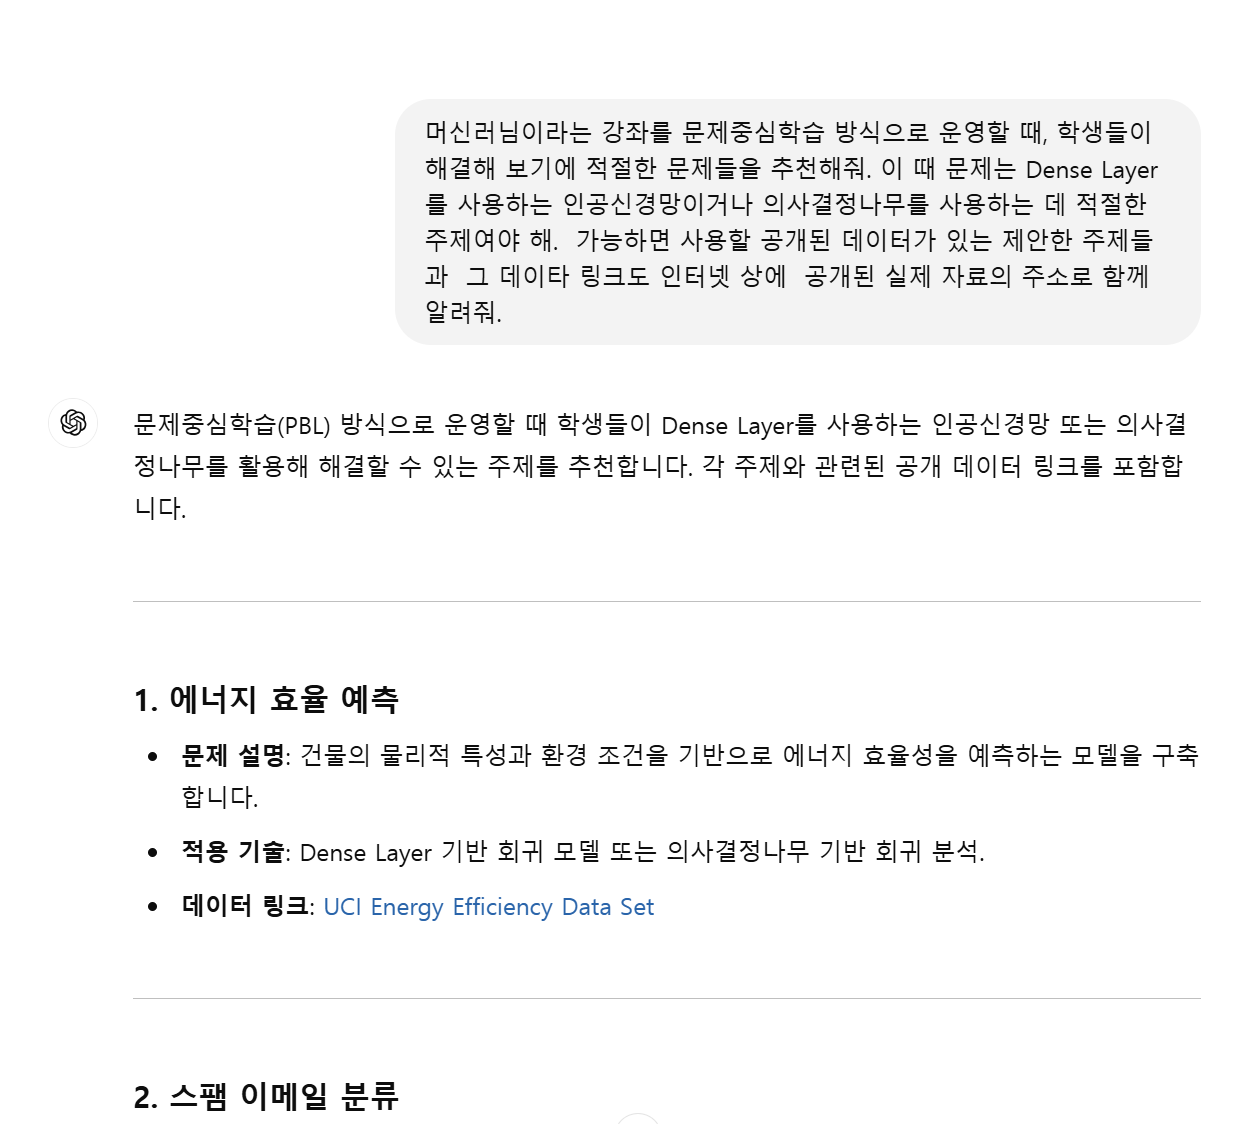

In [37]:
# 주제 주천-> Chat GPT 이용
Image("C:/Users/USER/OneDrive/Desktop/주제추천.png")

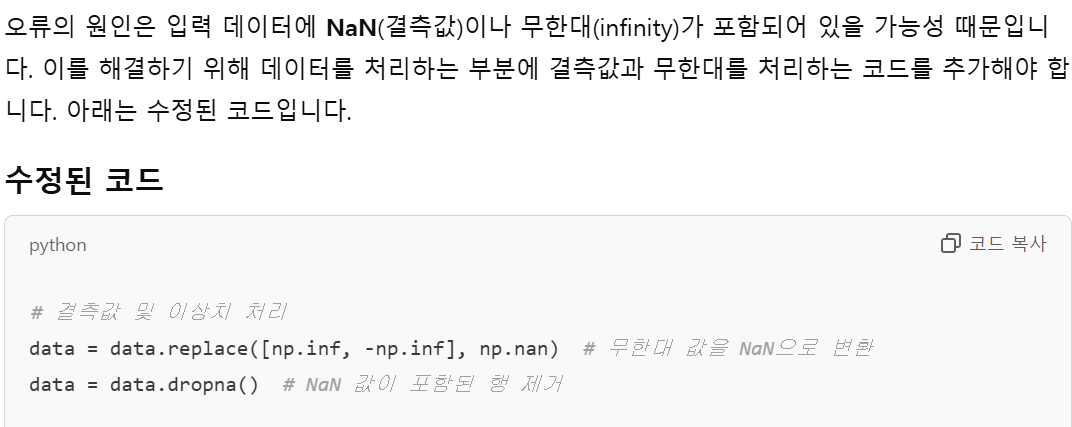

In [31]:
# 오류 발생-> Chat GPT로 해결
Image("C:/Users/USER/OneDrive/Desktop/error.png")

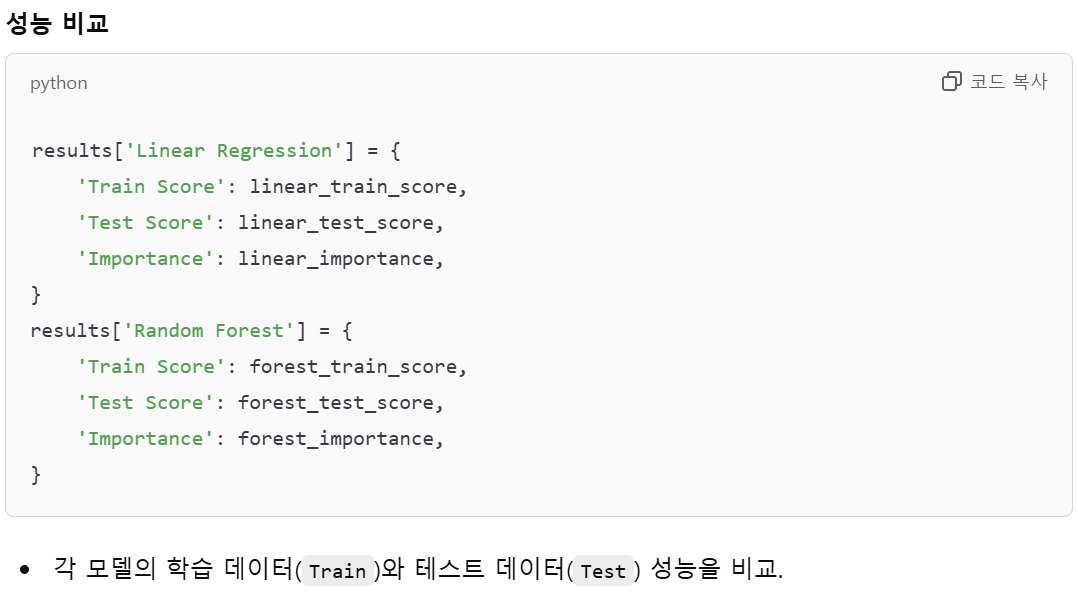

In [32]:
# 성능 비교하기 Chat-GPT code
Image("C:/Users/USER/OneDrive/Desktop/gpt도움.png")

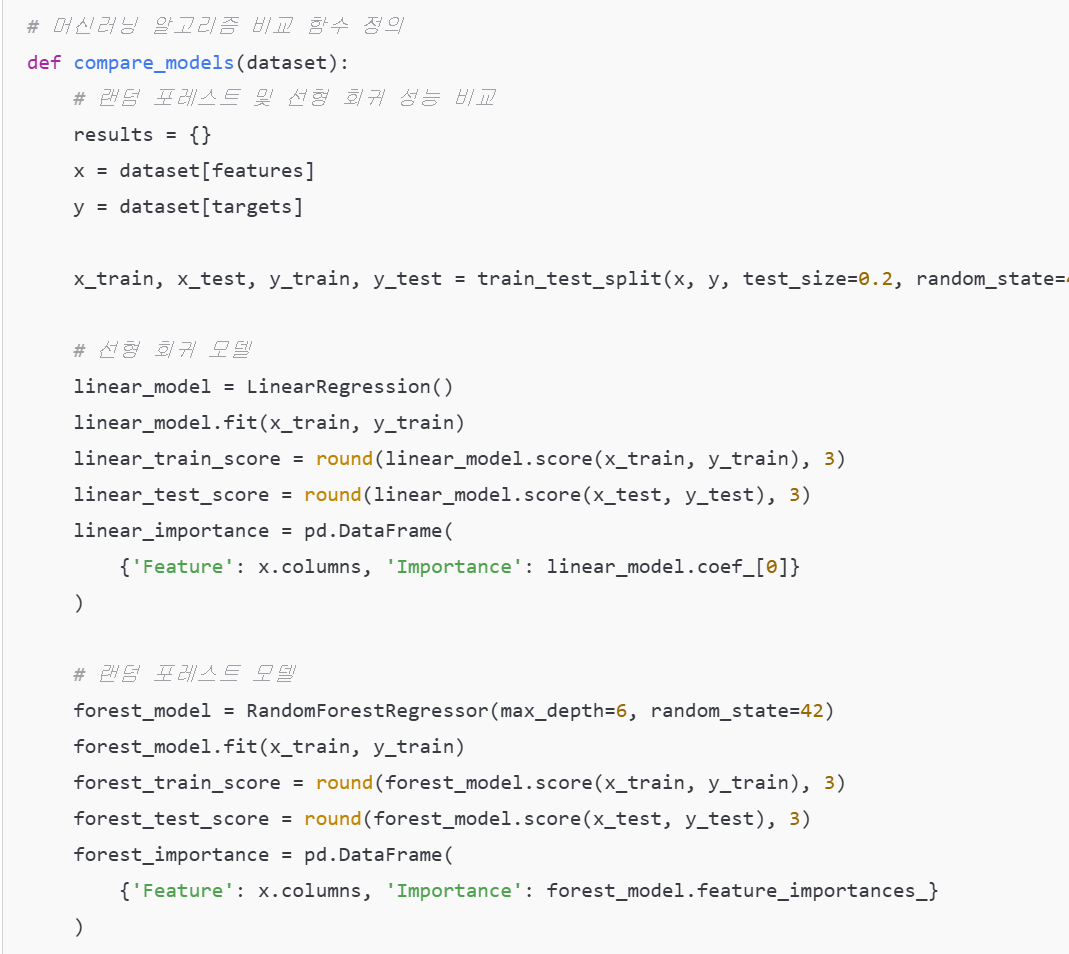

In [35]:
# 알고리즘 code 작성할 때 Chat-GPT의 도움을 받았습니다
Image("C:/Users/USER/OneDrive/Desktop/알고리즘gptcode.png")